# [POLSCI-5] Immigration

Estimated Time: 30-40 minutes <br>
Created by: Lauren Hom, Ravi Singhal

Today we will be examining two data sets on immigration to the United States, where these datasets were created from data collected by the United States Department of Homeland Security. We are going to analyze ecomomic and immigration patterns in North and South America and tie them to the events that were taking place at that time.

### Table of Contents 
* [Jupyter Introduction ](#0) <br>
* [The Datasets](#1)<br>
* [Table 1: Immigrants to the U.S.](#2)<br>
    * [Rows](#2b)<br>
    * [Columns](#2a)<br>
    * [Mexico](#2c)<br>
* [Table 2: Immigration by Class of Admission](#4)<br>
    * [Rows](#4b)<br>
    * [Columns](#4a)<br>
    * [Exploration of Central America](#4c)<br>
    * [Policy Response](#4d)<br>
* [Homework](#5)<br>
* [Data Science Opportunities at Berkeley](#6)<br>
* [Bibliography](#7)<br>

# Section 1. Jupyter Introduction <a id='0'></a>

This webpage is a Jupyter Notebook. We will use this notebook to analyze the United States Department of Homeland Security Dataset. Jupyter Notebooks are composed of both regular text and code cells. Code cells have a gray background. In order to run a code cell, click the cell and press `Shift + Enter` while the cell is selected or hit the `▶| Run` button in the toolbar at the top. An example of a code cell is below. Try running it. If everything works properly, the word "Success" should be printed under the cell.

In [18]:
# This cell sets up the notebook. Just run this cell.
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

print("Success!")

Success!


<br><br><br>
# Section 2. The Datasets <a id='1'></a>

The two tables (datasets) contain information about immigration to the United States. Here is a description of the data as stated on the United States Department of Homeland Security:

> "The 2017 Yearbook of Immigration Statistics is a compendium of tables that provide data on foreign nationals who are granted lawful permanent residence (i.e., immigrants who receive a “green card”), admitted as temporary nonimmigrants, granted asylum or refugee status, or are naturalized. The Yearbook also presents data on immigration enforcement actions, including apprehensions and arrests, removals, and returns"

The two datasets we will be looking at contain data on:
- Foreign nationals granted lawful permanent residence (i.e., immigrants who receive a “green card”) 
- Immigration enforcement actions 

**Note:** The data used for analysis will be based on **fiscal years**, a period that a government uses for accounting purposes. Therefore, each year in the data represents the year prior (e.g. 1996 fiscal year might represent 1995).

<br>If you want to read more about the dataset, click [here](https://www.dhs.gov/immigration-statistics/yearbook/2017).


<br><br><br>
# Section 3. Immigrants to the U.S. <a id='2'></a>

The first table we will explore contains data on the number of immigrants who obtained lawful permanent residence or received a "green card" to the U.S. on a temporary basis between 1995-2017 for a given country. The people represented in total numbers are people who were **born** in the specified country. One important thing to note is that this table only includes data on "authorized immigration", meaning only documented immigrants are counted.

Here are the first 5 fiscal years for Cuba:

In [19]:
# read in the dataset
birth_country = Table.read_table('ImmigrantsRegionCountry.csv').where('fiscal_year', are.above(1995))
birth_country.set_format('fiscal_year', formats.FunctionFormatter(lambda x: x)) # fix format of year column
birth_country.where('country', 'Cuba').show(5)

fiscal_year,country,total
1996,Cuba,26466
1997,Cuba,33587
1998,Cuba,17375
1999,Cuba,14132
2000,Cuba,18960


### Discussion A

This table presents data on lawful permanent residence or received a "green card" holders. What other types of immigration might occur? Related, this table presents only a subset of documented immigration. It relies on information that can be researched by embassies and border guards. One important thing to consider when looking at this dataset is if there is any bias. For example, one source of bias in this table is people falsifying which country they were born in. Can you think of any reasons why people might do this? Discuss with a partner and write a couple of sentences.

*WRITE YOUR RESPONSE HERE*

<br><br><br><br><br>
## Section 3.1. Rows <a id='2b'></a>

The rows in this dataset gives the total number of immigrants admitted during the specific fiscal year for a given country.

For example, let's look at the first row of the table representing the country Cuba. This row shows that there were 26,466 immigrants who were granted lawful permanent residence from Cuba in 1996.

In [20]:
birth_country.where('country', 'Cuba').show()

fiscal_year,country,total
1996,Cuba,26466
1997,Cuba,33587
1998,Cuba,17375
1999,Cuba,14132
2000,Cuba,18960
2001,Cuba,27453
2002,Cuba,28182
2003,Cuba,9262
2004,Cuba,20488
2005,Cuba,36261


<br><br><br><br><br>
## Section 3.2. Columns <a id='2a'></a>

Second, let's examine the columns of this dataset. There are a total of 3 columns in this table:
- `fiscal_year` - years range from 1995-2017
- `country` - country/region where immigrants came from
- `total` - the total number of immigrants for a given fiscal year

In [21]:
birth_country.show(5)

fiscal_year,country,total
1996,Afghanistan,1263
1996,Albania,4007
1996,Algeria,1059
1996,American Samoa,2
1996,Andorra,5


Here are some of the countries and regions in the table. There are a total of 237 countries and regions represented in the table. The table below shows the number of occurances of each country in the original table.

In [22]:
# Run this cell to display the first 10 countries and regions in the table
countries_regions = birth_country.group('country')
countries_regions.show(10)

country,count
Afghanistan,22
Albania,22
Algeria,22
American Samoa,14
Andorra,2
Angola,22
Anguilla,22
Antigua-Barbuda,22
Argentina,22
Armenia,22


Let's look at the data more closely for a specific country.

<br><br><br><br><br>
## Section 3.3. Mexico Analysis <a id='2b'></a>

We will specifically look at data for Mexico, paying particular attention to the total before and after 2008. We are going to examine the LPR (Persons Obtaining Lawful Permanent Resident Status).

First, let's filter the overall table so that we only have a subset of the data-- data on only Mexico.

In [23]:
# Shows only the data for the country Mexico 
mexico = birth_country.where('country', 'Mexico')
mexico.show()

fiscal_year,country,total
1996,Mexico,163572
1997,Mexico,146865
1998,Mexico,131575
1999,Mexico,147573
2000,Mexico,173493
2001,Mexico,205560
2002,Mexico,218822
2003,Mexico,115585
2004,Mexico,175411
2005,Mexico,161445


The table above shows just the rows that have Mexico in them, allowing us to see the trend in LPR over time much easier.

### Visualize the Data 

Let's take a look at the highest and lowest points that appear in the graph. 

In [24]:
# Row with the MINIMUM total immigration in Mexico
lowest_total = min(mexico.column('total')) 
mexico.where('total', lowest_total)

fiscal_year,country,total
2003,Mexico,115585


The table above shows the one row with the lowest number of immigrants granted LPR in Mexico. 

In comparison, table below shows one row with the highest number of immigrants granted LPR. By comparing the two `total` values with the data shown in the plot above, we can see that the highest total seems to be significantly higher than most of the other data points.

In [25]:
# Row with the MAXIMUM total immigration in Mexico
highest_total = max(mexico.column('total'))
mexico.where('total', highest_total)

fiscal_year,country,total
2002,Mexico,218822


Here is the data from the table showing the total number of immigrants granted lawful permanent status between 2008-2017:

In [26]:
mexico.where('fiscal_year', are.between_or_equal_to(2008, 2017))

fiscal_year,country,total
2008,Mexico,189989
2009,Mexico,164920
2010,Mexico,139120
2011,Mexico,143446
2012,Mexico,146406
2013,Mexico,135028
2014,Mexico,134052
2015,Mexico,158619
2016,Mexico,174534
2017,Mexico,170581


Using the data above, we can take a look at the change in the number of immigrants by plotting it over time from 1995-2017.

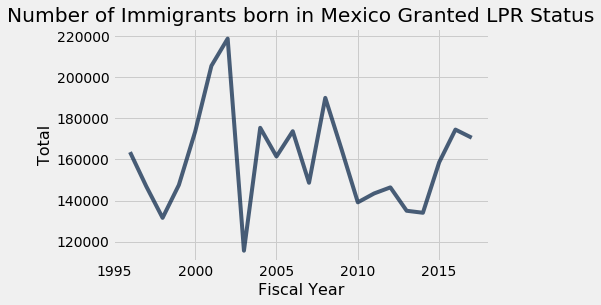

In [39]:
mexico.plot('fiscal_year', 'total') # generates the line plot with fiscal_year on the x-axis and total on the y-axis
plt.title('Number of Immigrants born in Mexico Granted LPR Status') # titles the plot
plt.ylabel('Total')
plt.xlabel('Fiscal Year')
plt.show()

### Discussion B

In 1995, the [Mexican Peso Crisis](https://en.wikipedia.org/wiki/Mexican_peso_crisis) occured. In 1997, [NAFTA](https://en.wikipedia.org/wiki/North_American_Free_Trade_Agreement) was agreed on. There was an [economic recession](https://en.wikipedia.org/wiki/Early_2000s_recession) in 2001. Observe how the graph changes in each of these years. We also see a drop in 2008. Why would economic shocks affect this graph? What happened in 2008 and how would this affect immigration? Discuss with a partner and write a couple of sentences.

*WRITE YOUR RESPONSE HERE*

<br><br><br><br><br><br><br><br><br>
# Section 4. Immigration by Class of Admission <a id='4'></a>

The final table we will explore provides information on the type of admission (class) immigrants granted lawful permanent residence received. The Department of Homeland Security describes the Immigrant Classes of Admissions, below:

> "A lawful permanent resident (LPR) or “green card” recipient may live and work anywhere in the United States and may apply to become U.S. citizens if they meet certain eligibility and admissibility requirements. The Immigration and Nationality Act (INA) provides several broad classes of admission for foreign nationals to gain LPR status, the largest of which focuses on admitting immigrants for the purpose of family reunification. Other major categories include economic and humanitarian immigrants, as well as immigrants from countries with relatively low levels of immigration to the United States." ([U.S. Department of Homeland Security](https://www.dhs.gov/immigration-statistics/lawful-permanent-residents/ImmigrantCOA))

Here are the first 5 rows of the table. There are 20,907 rows and 4 columns.

In [28]:
class_admission = Table.read_table('immigrants-class-perm.csv') # read in the dataset
class_admission.set_format('fiscal_year', formats.FunctionFormatter(lambda x: x)) # fix format of year column
class_admission.show(5)

country,type,fiscal_year,total
Afghanistan,Cancellation of Removal,1999,6
Afghanistan,Cancellation of Removal,2000,7
Afghanistan,Cancellation of Removal,2001,3
Afghanistan,Cancellation of Removal,2002,1
Afghanistan,Cancellation of Removal,2004,5


<br><br><br><br><br>
## Section 4.1. Rows <a id='4b'></a>

Each *row* in the table gives the total number of immigrants admitted under the stated class for a given country in a particular fiscal year. 

For example, here is the first row of the dataset. This row shows that there were 6 immigrants who were granted lawful permanent residence from Afghanistan in 1999 for the "Cancelation of Removal" class. 

In [29]:
class_admission.take(0) #takes the first row of the table

country,type,fiscal_year,total
Afghanistan,Cancellation of Removal,1999,6


<br><br><br><br><br>
## Section 4.2. Columns <a id='4a'></a>
There is an additional column in this table: `type`. The `type` refers to the class immigrants were admitted with to be granted lawful permanent residence. There are a total of 9 types or classes in the table.

In [30]:
# Run this cell to display all of the "types" of classes in the table, sorted by the type with the most occurences 
types = class_admission.group('type').sort('count', descending = True) 
types

type,count
Immediate relatives of U.S. citizens,4046
Employment-based preferences,3594
Family-sponsored preferences,3418
Diversity,3179
Refugees and asylees,3115
Other,2673
Cancellation of Removal,658
IRCA legalization,131
Suspension of Deportation,93


### Discussion C

With a partner, choose two types that you are unsure about. Each partner should look up one of the types [here](https://www.dhs.gov/immigration-statistics/lawful-permanent-residents/ImmigrantCOA). Briefly discuss what the types mean.

*WRITE YOUR RESPONSE HERE*

<br><br><br><br><br>
## Section 4.3. Exploration of Central America <a id='4c'></a>

Finally, we will look at the number of immigrants admitted under the "Refugees and asylees" class for Honduras, El Salvador, and Guatemala.

In [31]:
# filter data by country
guatemala_refugee = class_admission.where('country', 'Guatemala').where('type', 'Refugees and asylees').drop(0, 1).relabel('total', 'Guatemala total')
honduras_refugee = class_admission.where('country', 'Honduras').where('type', 'Refugees and asylees').drop(0, 1).relabel('total', 'Honduras total')
elsalvador_refugee = class_admission.where('country', 'El Salvador').where('type', 'Refugees and asylees').drop(0, 1).relabel('total', 'El Salvador total')
elsalvador_refugee.show(5)

fiscal_year,El Salvador total
1997,263
1998,127
1999,46
2000,76
2001,192


The final table for the subset of data for El Salvador is displayed above.

Let's combine all the data for each country into one table to make it easier to compare the values across countries.

In [32]:
latin_refugees = honduras_refugee.join('fiscal_year', elsalvador_refugee).join('fiscal_year', guatemala_refugee)
latin_refugees.show(5)

fiscal_year,Honduras total,El Salvador total,Guatemala total
1997,121,263,234
1998,107,127,261
1999,48,46,106
2000,62,76,139
2001,124,192,451


Finally, we can create the line plot of the total number of immigrants admitted under the "Refugees and Asylees" class from 1997-2017 by country.

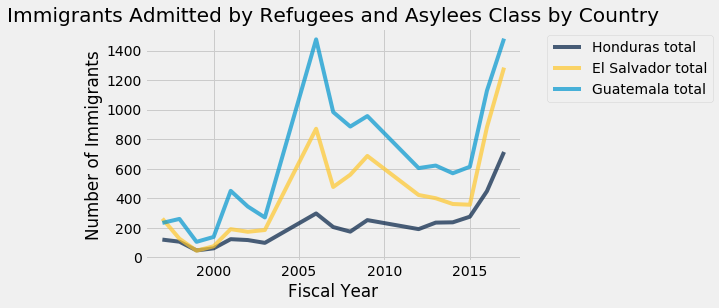

In [37]:
latin_refugees.plot('fiscal_year')
plt.title('Immigrants Admitted by Refugees and Asylees Class by Country')
plt.ylabel("Number of Immigrants")
plt.xlabel('Fiscal Year')
plt.show()

### Discussion D

Do the 3 lines tend to follow similar trends? Why might this be the case? Discuss with a partner.

*WRITE YOUR RESPONSE HERE*

<br><br><br><br><br>
## Section 4.4. Policy Response <a id='4d'></a>

Lastly, let's analyze refugee and asylum seekers in Myanmar (Burma). Here is just the data corresponding to the country Myanmar.

In [35]:
myanmar_refugees = class_admission.where('country', 'Burma').where('type', 'Refugees and asylees').drop(0, 1).relabel('total', 'Myanmar total')
myanmar_refugees

fiscal_year,Myanmar total
1997,68
1998,50
1999,27
2000,33
2001,96
2002,127
2003,151
2004,207
2005,490
2006,1976


Let's plot the number of refugee and asylum seekers over time.

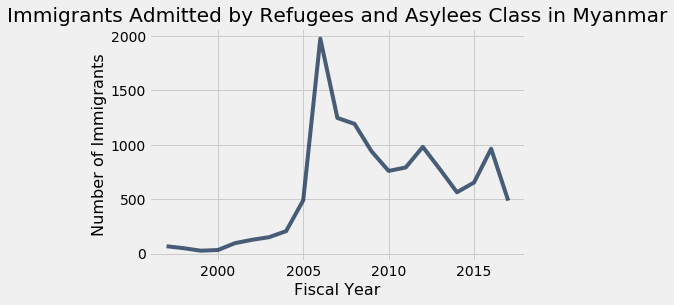

In [40]:
myanmar_refugees.plot('fiscal_year')
plt.title('Immigrants Admitted by Refugees and Asylees Class in Myanmar')
plt.ylabel("Number of Immigrants")
plt.xlabel('Fiscal Year')
plt.show()

### Discussion E

Notice the spike in the number of refugee and asylum seekers beginning in 2006. What do you think is the cause of this significant increase in refugee and asylum seekers? Discuss with a partner.

*WRITE YOUR RESPONSE HERE*

<br><br><br><br>

## Section 5. Homework <a id='5'></a>
<br>

### Question 1:

How would you measure undocumented immigrants in the United States?

*WRITE YOUR RESPONSE HERE*

<br><br><br><br><br><br><br><br>
# Data Science Opportunities at UC Berkeley <a id='6'></a>
If you are interested in data science, we offer several courses and even a major / minor here at UC Berkeley. Some great courses to start out are Data 8 and some 2 unit connector courses like History 88 and Demography 88. For the full list of courses we offer, click [here](https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings).

# Bibliography <a id='7'></a>
1. https://www.dhs.gov/immigration-statistics/yearbook/2017/table21